In [1]:
import numpy as np
import random
from math import e

random.seed(5)

In [2]:
def decayed_learning_rate(init_lr,decay_rate,step,decay_steps):
    return init_lr * pow(decay_rate,(step / decay_steps))

In [3]:
# 10 armed problem
class ten_armed_machine():
    def __init__(self):
        mu, sigma = 0, 1
        self.action_mean = np.random.normal(mu,sigma,10)
    def query(self,action):
        return np.random.normal(self.action_mean[action],1,1)
    def display(self):
        return self.action_mean

In [27]:
# iteration number, mode is decay mode or constant mode, k is the number of actions, machine is the machine to be used
def bandit(iteration,mode,k,machine,eta_,reset,optimal_action):
    Q = [0 for h in range(k)]
    N = [0 for h in range(k)]
    total = 0
    Average = []
    Opt_percent = []
    if mode == 0:
        fixed_eta = eta_
        for i in range(0,iteration):
            for x in reset:
                if i==x:
                    Q= [0 for h in range(k)]
                    N= [0 for h in range(k)]
            eta = random.random()
            A = 0
            if eta <= fixed_eta:
                A = random.randrange(0,k)
            else:
                max_value = max(Q)
                max_index = Q.index(max_value)
                A = max_index
            R = machine.query(A)
            N[A] = N[A] + 1
            Q[A] = Q[A] + 1/N[A]*(R-Q[A])
            total = total + R
            Average.append(R)
            Opt_percent.append(N[optimal_action]/(i+1))
    else:
        init_eta = eta_
        decay_rate = 1/e
        for i in range(0,iteration):
            fixed_eta = decayed_learning_rate(init_eta,decay_rate,i,iteration)
            eta = random.random()
            A = 0
            if eta<=fixed_eta:
                A = random.randrange(0,k)
            else:
                max_value = max(Q)
                max_index = Q.index(max_value)
                A = max_index
            R = machine.query(A)
            N[A] = N[A] + 1
            Q[A] = Q[A] + 1/N[A]*(R-Q[A])
            total = total + R
            Average.append(total/(i+1))
            Opt_percent.append(N[optimal_action]/(i+1))
    return [total,Q,N,Average,Opt_percent]

In [19]:
epsilon = [0,0.1,0.01]
iteration = 2000
experiment_trials = 2000
Average_list = [[] for x in range(len(epsilon))]
Optimal_list = [[] for x in range(len(epsilon))]
Max_score = []
mode = 0
k = 10
Statistics = []
optimal_action = 0
machine = ten_armed_machine()
reset = []
print("actual reward for each action:",machine.display())
expected_optimal = max(machine.display()) # optimal averageexpected case
for i in range(experiment_trials):
    print("progress",i)
#     machine = ten_armed_machine()
    for j in range(len(epsilon)):
        statistics = bandit(iteration,mode,k,machine,epsilon[j],reset,optimal_action)
        Average_list[j].append(np.array(statistics[3]))
        Optimal_list[j].append(np.array(statistics[2]))


actual reward for each action: [-1.35809095 -1.07828308  1.00241863  1.54319342  0.39131495 -0.5814207
 -0.21753435  0.62817941  0.11247592 -1.36510506]
progress 0
progress 1
progress 2
progress 3
progress 4
progress 5
progress 6
progress 7
progress 8
progress 9
progress 10
progress 11
progress 12
progress 13
progress 14
progress 15
progress 16
progress 17
progress 18
progress 19
progress 20
progress 21
progress 22
progress 23
progress 24
progress 25
progress 26
progress 27
progress 28
progress 29
progress 30
progress 31
progress 32
progress 33
progress 34
progress 35
progress 36
progress 37
progress 38
progress 39
progress 40
progress 41
progress 42
progress 43
progress 44
progress 45
progress 46
progress 47
progress 48
progress 49
progress 50
progress 51
progress 52
progress 53
progress 54
progress 55
progress 56
progress 57
progress 58
progress 59
progress 60
progress 61
progress 62
progress 63
progress 64
progress 65
progress 66
progress 67
progress 68
progress 69
progress 70
progr

progress 627
progress 628
progress 629
progress 630
progress 631
progress 632
progress 633
progress 634
progress 635
progress 636
progress 637
progress 638
progress 639
progress 640
progress 641
progress 642
progress 643
progress 644
progress 645
progress 646
progress 647
progress 648
progress 649
progress 650
progress 651
progress 652
progress 653
progress 654
progress 655
progress 656
progress 657
progress 658
progress 659
progress 660
progress 661
progress 662
progress 663
progress 664
progress 665
progress 666
progress 667
progress 668
progress 669
progress 670
progress 671
progress 672
progress 673
progress 674
progress 675
progress 676
progress 677
progress 678
progress 679
progress 680
progress 681
progress 682
progress 683
progress 684
progress 685
progress 686
progress 687
progress 688
progress 689
progress 690
progress 691
progress 692
progress 693
progress 694
progress 695
progress 696
progress 697
progress 698
progress 699
progress 700
progress 701
progress 702
progress 703

progress 1239
progress 1240
progress 1241
progress 1242
progress 1243
progress 1244
progress 1245
progress 1246
progress 1247
progress 1248
progress 1249
progress 1250
progress 1251
progress 1252
progress 1253
progress 1254
progress 1255
progress 1256
progress 1257
progress 1258
progress 1259
progress 1260
progress 1261
progress 1262
progress 1263
progress 1264
progress 1265
progress 1266
progress 1267
progress 1268
progress 1269
progress 1270
progress 1271
progress 1272
progress 1273
progress 1274
progress 1275
progress 1276
progress 1277
progress 1278
progress 1279
progress 1280
progress 1281
progress 1282
progress 1283
progress 1284
progress 1285
progress 1286
progress 1287
progress 1288
progress 1289
progress 1290
progress 1291
progress 1292
progress 1293
progress 1294
progress 1295
progress 1296
progress 1297
progress 1298
progress 1299
progress 1300
progress 1301
progress 1302
progress 1303
progress 1304
progress 1305
progress 1306
progress 1307
progress 1308
progress 1309
progre

progress 1826
progress 1827
progress 1828
progress 1829
progress 1830
progress 1831
progress 1832
progress 1833
progress 1834
progress 1835
progress 1836
progress 1837
progress 1838
progress 1839
progress 1840
progress 1841
progress 1842
progress 1843
progress 1844
progress 1845
progress 1846
progress 1847
progress 1848
progress 1849
progress 1850
progress 1851
progress 1852
progress 1853
progress 1854
progress 1855
progress 1856
progress 1857
progress 1858
progress 1859
progress 1860
progress 1861
progress 1862
progress 1863
progress 1864
progress 1865
progress 1866
progress 1867
progress 1868
progress 1869
progress 1870
progress 1871
progress 1872
progress 1873
progress 1874
progress 1875
progress 1876
progress 1877
progress 1878
progress 1879
progress 1880
progress 1881
progress 1882
progress 1883
progress 1884
progress 1885
progress 1886
progress 1887
progress 1888
progress 1889
progress 1890
progress 1891
progress 1892
progress 1893
progress 1894
progress 1895
progress 1896
progre

In [21]:
# Average1 = np.zeros((1000,1))
# Average2 = np.zeros((1000,1))
# Average3 = np.zeros((1000,1))
# for x in Average_list[0]:
#     Average1 = np.add(Average1,x)
# for x in Average_list[1]:
#     Average2 = np.add(Average2,x)
# for x in Average_list[2]:
#     Average3 = np.add(Average3,x)
# Average1 = Average1/2000
# Average2 = Average2/2000
# Average3 = Average3/2000
Average = []
print(Optimal_list[1][0])
for x in Average_list:
    print(np.array(x).shape)
    Average.append(np.array(x).sum(axis=0)/experiment_trials)
print(Average)

[  25   23   98 1716   25   15   19   32   20   27]
(2000, 2000, 1)
(2000, 2000, 1)
(2000, 2000, 1)
[array([[-1.37505561],
       [-1.10244914],
       [ 0.5498998 ],
       ...,
       [ 1.10051433],
       [ 1.12446513],
       [ 1.13989418]]), array([[-1.27054948],
       [-0.93120836],
       [ 0.39973592],
       ...,
       [ 1.39260473],
       [ 1.40296102],
       [ 1.36775168]]), array([[-1.34305032],
       [-1.07057497],
       [ 0.5092415 ],
       ...,
       [ 1.33044549],
       [ 1.3806568 ],
       [ 1.39118459]])]


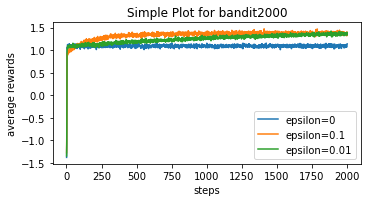

In [22]:
import matplotlib.pyplot as plt
x = []
for i in range(iteration):
    x.append(i+1)
y = []
for i in range(len(epsilon)):
    y.append(Average[i])

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
for i in range(len(epsilon)):
    ax.plot(x, y[i], label='epsilon='+str(epsilon[i]))  # Plot some data on the axes.
ax.set_xlabel('steps')  # Add an x-label to the axes.
ax.set_ylabel('average rewards')  # Add a y-label to the axes.
ax.set_title("Simple Plot for bandit"+str(iteration))  # Add a title to the axes.
ax.legend()  # Add a legend.

In [37]:
# rerun the experiement for optimal percentage
epsilon = [0,0.1,0.01]
iteration = 2000
experiment_trials = 200
Average_list = [[] for x in range(len(epsilon))]
Optimal_list = [[] for x in range(len(epsilon))]
Max_score = []
mode = 0
k = 10
Statistics = []
reset = []
optimal_action = 3
expected_optimal = max(machine.display()) # optimal averageexpected case
for i in range(experiment_trials):
    print("progress",i)
#     machine = ten_armed_machine()
    for j in range(len(epsilon)):
        statistics = bandit(iteration,mode,k,machine,epsilon[j],reset,optimal_action)
        Optimal_list[j].append(np.array(statistics[4]))


progress 0
progress 1
progress 2
progress 3
progress 4
progress 5
progress 6
progress 7
progress 8
progress 9
progress 10
progress 11
progress 12
progress 13
progress 14
progress 15
progress 16
progress 17
progress 18
progress 19
progress 20
progress 21
progress 22
progress 23
progress 24
progress 25
progress 26
progress 27
progress 28
progress 29
progress 30
progress 31
progress 32
progress 33
progress 34
progress 35
progress 36
progress 37
progress 38
progress 39
progress 40
progress 41
progress 42
progress 43
progress 44
progress 45
progress 46
progress 47
progress 48
progress 49
progress 50
progress 51
progress 52
progress 53
progress 54
progress 55
progress 56
progress 57
progress 58
progress 59
progress 60
progress 61
progress 62
progress 63
progress 64
progress 65
progress 66
progress 67
progress 68
progress 69
progress 70
progress 71
progress 72
progress 73
progress 74
progress 75
progress 76
progress 77
progress 78
progress 79
progress 80
progress 81
progress 82
progress 83
pr

[array([0.        , 0.        , 0.        , ..., 0.17466717, 0.17466733,
       0.1746675 ]), array([0.02      , 0.02      , 0.02333333, ..., 0.82492492, 0.82495248,
       0.8250025 ]), array([0.005     , 0.005     , 0.005     , ..., 0.52337588, 0.52345673,
       0.523535  ])]


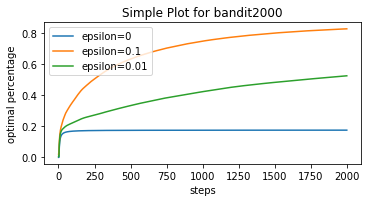

In [38]:
Optimal = []
for x in Optimal_list:
    Optimal.append(np.array(x).sum(axis=0)/experiment_trials)
print(Optimal)
import matplotlib.pyplot as plt
x = []
for i in range(iteration):
    x.append(i+1)
y = []
for i in range(len(epsilon)):
    y.append(Optimal[i])

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
for i in range(len(epsilon)):
    ax.plot(x, y[i], label='epsilon='+str(epsilon[i]))  # Plot some data on the axes.
ax.set_xlabel('steps')  # Add an x-label to the axes.
ax.set_ylabel('optimal percentage')  # Add a y-label to the axes.
ax.set_title("Simple Plot for bandit"+str(iteration))  # Add a title to the axes.
ax.legend()  # Add a legend.

In [54]:
import pandas as pd
df=pd.read_csv('Ads_Optimisation.csv')
dataset = df.to_numpy()
print(dataset.shape)
class dataset_machine():
    def __init__(self,dataset):
        self.dataset = dataset
        self.env_index = 0
    def query(self,action):
        result = self.dataset[self.env_index][action]
        self.env_index += 1
        if(self.env_index>=self.dataset.shape[0]):
            self.env_index = 0
        return result
    def display(self):
        return self.dataset[self.env_index]

(10000, 10)


In [92]:
epsilon = [0,0.01,0.1]
iteration = 10000            #dataset.shape[0]
experiment_trials = 2000

Average_list = [[] for x in range(len(epsilon))]
Optimal_list = [[] for x in range(len(epsilon))]
Max_score = []
mode = 0
k = 10
Statistics = []
reset = []
optimal_action =0
# np.random.shuffle(dataset)
# machine2 = dataset_machine(dataset)
for i in range(experiment_trials):
    print("progress",i)
    np.random.shuffle(dataset)
    machine2 = dataset_machine(dataset)
    for j in range(len(epsilon)):
        statistics = bandit(iteration,mode,k,machine2,epsilon[j],reset,optimal_action)
        Average_list[j].append(np.array(statistics[3]))
        Optimal_list[j].append(np.array(statistics[2]))
        Max_score.append(statistics[0])

progress 0
progress 1
progress 2
progress 3
progress 4
progress 5
progress 6
progress 7
progress 8
progress 9
progress 10
progress 11
progress 12
progress 13
progress 14
progress 15
progress 16
progress 17
progress 18
progress 19
progress 20
progress 21
progress 22
progress 23
progress 24
progress 25
progress 26
progress 27
progress 28
progress 29
progress 30
progress 31
progress 32
progress 33
progress 34
progress 35
progress 36
progress 37
progress 38
progress 39
progress 40
progress 41
progress 42
progress 43
progress 44
progress 45
progress 46
progress 47
progress 48
progress 49
progress 50
progress 51
progress 52
progress 53
progress 54
progress 55
progress 56
progress 57
progress 58
progress 59
progress 60
progress 61
progress 62
progress 63
progress 64
progress 65
progress 66
progress 67
progress 68
progress 69
progress 70
progress 71
progress 72
progress 73
progress 74
progress 75
progress 76
progress 77
progress 78
progress 79
progress 80
progress 81
progress 82
progress 83
pr

progress 639
progress 640
progress 641
progress 642
progress 643
progress 644
progress 645
progress 646
progress 647
progress 648
progress 649
progress 650
progress 651
progress 652
progress 653
progress 654
progress 655
progress 656
progress 657
progress 658
progress 659
progress 660
progress 661
progress 662
progress 663
progress 664
progress 665
progress 666
progress 667
progress 668
progress 669
progress 670
progress 671
progress 672
progress 673
progress 674
progress 675
progress 676
progress 677
progress 678
progress 679
progress 680
progress 681
progress 682
progress 683
progress 684
progress 685
progress 686
progress 687
progress 688
progress 689
progress 690
progress 691
progress 692
progress 693
progress 694
progress 695
progress 696
progress 697
progress 698
progress 699
progress 700
progress 701
progress 702
progress 703
progress 704
progress 705
progress 706
progress 707
progress 708
progress 709
progress 710
progress 711
progress 712
progress 713
progress 714
progress 715

progress 1250
progress 1251
progress 1252
progress 1253
progress 1254
progress 1255
progress 1256
progress 1257
progress 1258
progress 1259
progress 1260
progress 1261
progress 1262
progress 1263
progress 1264
progress 1265
progress 1266
progress 1267
progress 1268
progress 1269
progress 1270
progress 1271
progress 1272
progress 1273
progress 1274
progress 1275
progress 1276
progress 1277
progress 1278
progress 1279
progress 1280
progress 1281
progress 1282
progress 1283
progress 1284
progress 1285
progress 1286
progress 1287
progress 1288
progress 1289
progress 1290
progress 1291
progress 1292
progress 1293
progress 1294
progress 1295
progress 1296
progress 1297
progress 1298
progress 1299
progress 1300
progress 1301
progress 1302
progress 1303
progress 1304
progress 1305
progress 1306
progress 1307
progress 1308
progress 1309
progress 1310
progress 1311
progress 1312
progress 1313
progress 1314
progress 1315
progress 1316
progress 1317
progress 1318
progress 1319
progress 1320
progre

progress 1836
progress 1837
progress 1838
progress 1839
progress 1840
progress 1841
progress 1842
progress 1843
progress 1844
progress 1845
progress 1846
progress 1847
progress 1848
progress 1849
progress 1850
progress 1851
progress 1852
progress 1853
progress 1854
progress 1855
progress 1856
progress 1857
progress 1858
progress 1859
progress 1860
progress 1861
progress 1862
progress 1863
progress 1864
progress 1865
progress 1866
progress 1867
progress 1868
progress 1869
progress 1870
progress 1871
progress 1872
progress 1873
progress 1874
progress 1875
progress 1876
progress 1877
progress 1878
progress 1879
progress 1880
progress 1881
progress 1882
progress 1883
progress 1884
progress 1885
progress 1886
progress 1887
progress 1888
progress 1889
progress 1890
progress 1891
progress 1892
progress 1893
progress 1894
progress 1895
progress 1896
progress 1897
progress 1898
progress 1899
progress 1900
progress 1901
progress 1902
progress 1903
progress 1904
progress 1905
progress 1906
progre

[18, 0, 0, 0, 1836, 0, 0, 146, 0, 0]
optimal action is: 4
2690
(2000, 10000)
(2000, 10000)
(2000, 10000)
[array([0.18  , 0.17  , 0.1585, ..., 0.165 , 0.1765, 0.158 ]), array([0.18  , 0.17  , 0.16  , ..., 0.245 , 0.2455, 0.238 ]), array([0.177 , 0.168 , 0.152 , ..., 0.261 , 0.2655, 0.24  ])]
0.158
0.238
0.24


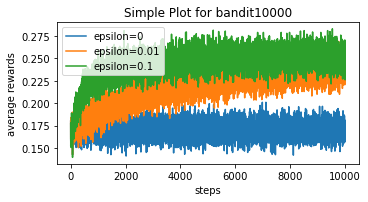

In [93]:
Average = []
Optim = []
max_list = []
for x in Optimal_list:
    max_list.append(np.argmax(np.array(x),axis=1))
max_list_2 = max_list[2].tolist()
for i in range(10):
    Optim.append(max_list_2.count(i))
print(Optim)
Optimal_A = np.argmax(np.array(Optim))
print("optimal action is:",Optimal_A)
print(max(Max_score))
for x in Average_list:
    print(np.array(x).shape)
    Average.append(np.array(x).sum(axis=0)/experiment_trials)
print(Average)
x = []
for i in range(iteration):
    x.append(i+1)
y = []
for i in range(len(epsilon)):
    y.append(Average[i])
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
for i in range(len(epsilon)):
    ax.plot(x, y[i], label='epsilon='+str(epsilon[i]))  # Plot some data on the axes.
    print(y[i][len(y[i])-1])
ax.set_xlabel('steps')  # Add an x-label to the axes.
ax.set_ylabel('average rewards')  # Add a y-label to the axes.
ax.set_title("Simple Plot for bandit"+str(iteration))  # Add a title to the axes.
ax.legend();  # Add a legend.

In [94]:
epsilon = [0,0.01,0.1]
iteration = 10000            #dataset.shape[0]
experiment_trials = 100

Average_list = [[] for x in range(len(epsilon))]
Optimal_list = [[] for x in range(len(epsilon))]
Max_score = []
mode = 0
k = 10
Statistics = []
reset = []
optimal_action = 4
# np.random.shuffle(dataset)
# machine2 = dataset_machine(dataset)
for i in range(experiment_trials):
    print("progress",i)
    np.random.shuffle(dataset)
    machine2 = dataset_machine(dataset)
    for j in range(len(epsilon)):
        statistics = bandit(iteration,mode,k,machine2,epsilon[j],reset,optimal_action)
        Average_list[j].append(np.array(statistics[3]))
        Optimal_list[j].append(np.array(statistics[4]))

progress 0
progress 1
progress 2
progress 3
progress 4
progress 5
progress 6
progress 7
progress 8
progress 9
progress 10
progress 11
progress 12
progress 13
progress 14
progress 15
progress 16
progress 17
progress 18
progress 19
progress 20
progress 21
progress 22
progress 23
progress 24
progress 25
progress 26
progress 27
progress 28
progress 29
progress 30
progress 31
progress 32
progress 33
progress 34
progress 35
progress 36
progress 37
progress 38
progress 39
progress 40
progress 41
progress 42
progress 43
progress 44
progress 45
progress 46
progress 47
progress 48
progress 49
progress 50
progress 51
progress 52
progress 53
progress 54
progress 55
progress 56
progress 57
progress 58
progress 59
progress 60
progress 61
progress 62
progress 63
progress 64
progress 65
progress 66
progress 67
progress 68
progress 69
progress 70
progress 71
progress 72
progress 73
progress 74
progress 75
progress 76
progress 77
progress 78
progress 79
progress 80
progress 81
progress 82
progress 83
pr

[array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.47470594, 0.47472447,
       0.474742  ]), array([0.        , 0.005     , 0.01      , ..., 0.71773255, 0.71775278,
       0.71777   ])]


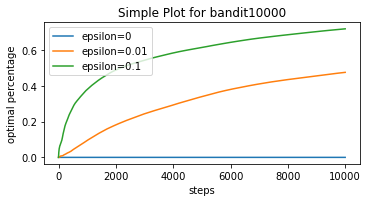

In [95]:
Optimal = []
for x in Optimal_list:
    Optimal.append(np.array(x).sum(axis=0)/experiment_trials)
print(Optimal)
import matplotlib.pyplot as plt
x = []
for i in range(iteration):
    x.append(i+1)
y = []
for i in range(len(epsilon)):
    y.append(Optimal[i])

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
for i in range(len(epsilon)):
    ax.plot(x, y[i], label='epsilon='+str(epsilon[i]))  # Plot some data on the axes.
ax.set_xlabel('steps')  # Add an x-label to the axes.
ax.set_ylabel('optimal percentage')  # Add a y-label to the axes.
ax.set_title("Simple Plot for bandit"+str(iteration))  # Add a title to the axes.
ax.legend()  # Add a legend.

In [96]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(dataset)
Dataset = [[] for x in range(0,n_clusters)]
for i in range(len(dataset)):
    Dataset[kmeans.labels_[i]].append(dataset[i])
reset = []
for x in Dataset:
    reset.append(len(x))
    
new_dataset = []
for x in Dataset:
    for y in x:
        new_dataset.append(y)
new_dataset = np.array(new_dataset)

In [97]:
def shuffle_data(Dataset):
    new_dataset = []
    for x in Dataset:
        np.random.shuffle(x)
        for y in x:
            new_dataset.append(y)
    new_dataset = np.array(new_dataset)
    return new_dataset

In [ ]:
class simulated_ten_armed_machine():
    def __init__(self):
        self.action_mean = np.array([0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489]
)
    def query(self,action):
        return self.action_mean[action]
    def display(self):
        return self.action_mean

In [105]:
epsilon = [0,0.01,0.1]
iteration = 10000            #dataset.shape[0]
experiment_trials = 1000

Average_list = [[] for x in range(len(epsilon))]
Optimal_list = [[] for x in range(len(epsilon))]
Max_score = []
mode = 0
k = 10
Statistics = []
reset = []
optimal_action =0
# np.random.shuffle(dataset)
# machine2 = dataset_machine(dataset)
for i in range(experiment_trials):
    print("progress",i)
    dataset = shuffle_data(Dataset)
    machine2 = dataset_machine(dataset)
    for j in range(len(epsilon)):
        statistics = bandit(iteration,mode,k,machine2,epsilon[j],reset,optimal_action)
        Average_list[j].append(np.array(statistics[3]))
        Optimal_list[j].append(np.array(statistics[2]))
        Max_score.append(statistics[0])

progress 0
progress 1
progress 2
progress 3
progress 4
progress 5
progress 6
progress 7
progress 8
progress 9
progress 10
progress 11
progress 12
progress 13
progress 14
progress 15
progress 16
progress 17
progress 18
progress 19
progress 20
progress 21
progress 22
progress 23
progress 24
progress 25
progress 26
progress 27
progress 28
progress 29
progress 30
progress 31
progress 32
progress 33
progress 34
progress 35
progress 36
progress 37
progress 38
progress 39
progress 40
progress 41
progress 42
progress 43
progress 44
progress 45
progress 46
progress 47
progress 48
progress 49
progress 50
progress 51
progress 52
progress 53
progress 54
progress 55
progress 56
progress 57
progress 58
progress 59
progress 60
progress 61
progress 62
progress 63
progress 64
progress 65
progress 66
progress 67
progress 68
progress 69
progress 70
progress 71
progress 72
progress 73
progress 74
progress 75
progress 76
progress 77
progress 78
progress 79
progress 80
progress 81
progress 82
progress 83
pr

progress 639
progress 640
progress 641
progress 642
progress 643
progress 644
progress 645
progress 646
progress 647
progress 648
progress 649
progress 650
progress 651
progress 652
progress 653
progress 654
progress 655
progress 656
progress 657
progress 658
progress 659
progress 660
progress 661
progress 662
progress 663
progress 664
progress 665
progress 666
progress 667
progress 668
progress 669
progress 670
progress 671
progress 672
progress 673
progress 674
progress 675
progress 676
progress 677
progress 678
progress 679
progress 680
progress 681
progress 682
progress 683
progress 684
progress 685
progress 686
progress 687
progress 688
progress 689
progress 690
progress 691
progress 692
progress 693
progress 694
progress 695
progress 696
progress 697
progress 698
progress 699
progress 700
progress 701
progress 702
progress 703
progress 704
progress 705
progress 706
progress 707
progress 708
progress 709
progress 710
progress 711
progress 712
progress 713
progress 714
progress 715

[1000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
optimal action is: 0
4209


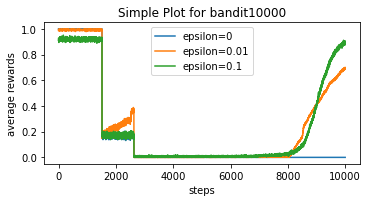

In [106]:
Average = []
Optim = []
max_list = []
for x in Optimal_list:
    max_list.append(np.argmax(np.array(x),axis=1))
max_list_2 = max_list[2].tolist()
for i in range(10):
    Optim.append(max_list_2.count(i))
print(Optim)
Optimal_A = np.argmax(np.array(Optim))
print("optimal action is:",Optimal_A)
print(max(Max_score))
for x in Average_list:
    Average.append(np.array(x).sum(axis=0)/experiment_trials)
x = []
for i in range(iteration):
    x.append(i+1)
y = []
for i in range(len(epsilon)):
    y.append(Average[i])
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
for i in range(len(epsilon)):
    ax.plot(x, y[i], label='epsilon='+str(epsilon[i]))  # Plot some data on the axes.
ax.set_xlabel('steps')  # Add an x-label to the axes.
ax.set_ylabel('average rewards')  # Add a y-label to the axes.
ax.set_title("Simple Plot for bandit"+str(iteration))  # Add a title to the axes.
ax.legend();  # Add a legend.

In [108]:
print(dataset.sum(axis=0)/dataset.shape[0])
print(dataset.sum(axis=0))


[0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489]
[1703 1295  728 1196 2695  126 1112 2091  952  489]
